<a href="https://colab.research.google.com/github/SergiCala/Data-Science.io/blob/main/Proyecto_ML_Idealista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
import graphviz

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving house_data.csv to house_data.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded["house_data.csv"]))

In [ ]:
data.head()

,id,energy_certification,price,rooms_number,bath_number,has_lift,has_garden,has_swimming_pool,has_terrace,constructed_area,is_new_development,is_needs_renovating,is_good_condition
0,99894580,E,160000,3,1,True,False,False,True,70,0,0,1
1,100042487,C,162000,3,1,True,False,False,False,85,0,0,1
2,99631478,INPROCESS,163000,2,1,True,False,False,False,77,0,0,1
3,98395587,UNKNOWN,163000,2,1,False,False,False,False,76,0,0,1
4,96171769,INPROCESS,165000,2,1,True,False,False,True,92,0,0,1


In [ ]:
data.drop(["energy_certification", "id"], axis=1, inplace=True)

In [ ]:
data["has_lift"] = data["has_lift"].astype(int)
data["has_garden"] = data["has_garden"].astype(int)
data["has_swimming_pool"] = data["has_swimming_pool"].astype(int)
data["has_terrace"] = data["has_terrace"].astype(int)
data

,price,rooms_number,bath_number,has_lift,has_garden,has_swimming_pool,has_terrace,constructed_area,is_new_development,is_needs_renovating,is_good_condition
0,160000,3,1,1,0,0,1,70,0,0,1
1,162000,3,1,1,0,0,0,85,0,0,1
2,163000,2,1,1,0,0,0,77,0,0,1
3,163000,2,1,0,0,0,0,76,0,0,1
4,165000,2,1,1,0,0,1,92,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
893,300000,2,2,1,1,1,1,135,0,0,1
894,300000,2,2,1,1,1,1,120,0,0,1
895,303000,2,2,1,1,1,1,109,0,0,1
896,303000,2,2,1,0,1,1,108,0,0,1


In [ ]:
data_correlation = data.corr()
data_correlation

,price,rooms_number,bath_number,has_lift,has_garden,has_swimming_pool,has_terrace,constructed_area,is_new_development,is_needs_renovating,is_good_condition
price,1.000000,0.453657,0.633538,-0.242006,0.324601,0.409024,0.281489,0.635472,0.197241,-0.079346,-0.040339
rooms_number,0.453657,1.000000,0.554765,-0.380980,-0.051252,-0.022868,0.123058,0.604681,0.000413,-0.009165,0.007449
bath_number,0.633538,0.554765,1.000000,-0.160737,0.317579,0.372908,0.252693,0.704977,-0.038440,-0.140302,0.142453
has_lift,-0.242006,-0.380980,-0.160737,1.000000,0.144417,0.159168,0.087904,-0.260616,0.107136,-0.151757,0.081721
has_garden,0.324601,-0.051252,0.317579,0.144417,1.000000,0.672976,0.340025,0.190782,-0.172954,-0.116115,0.195004
has_swimming_pool,0.409024,-0.022868,0.372908,0.159168,0.672976,1.000000,0.356695,0.142528,0.048605,-0.156621,0.116347
has_terrace,0.281489,0.123058,0.252693,0.087904,0.340025,0.356695,1.000000,0.176369,0.073486,0.068760,-0.089374
constructed_area,0.635472,0.604681,0.704977,-0.260616,0.190782,0.142528,0.176369,1.000000,-0.091061,-0.046909,0.083452
is_new_development,0.197241,0.000413,-0.038440,0.107136,-0.172954,0.048605,0.073486,-0.091061,1.000000,-0.031653,-0.486204
is_needs_renovating,-0.079346,-0.009165,-0.140302,-0.151757,-0.116115,-0.156621,0.068760,-0.046909,-0.031653,1.000000,-0.848354


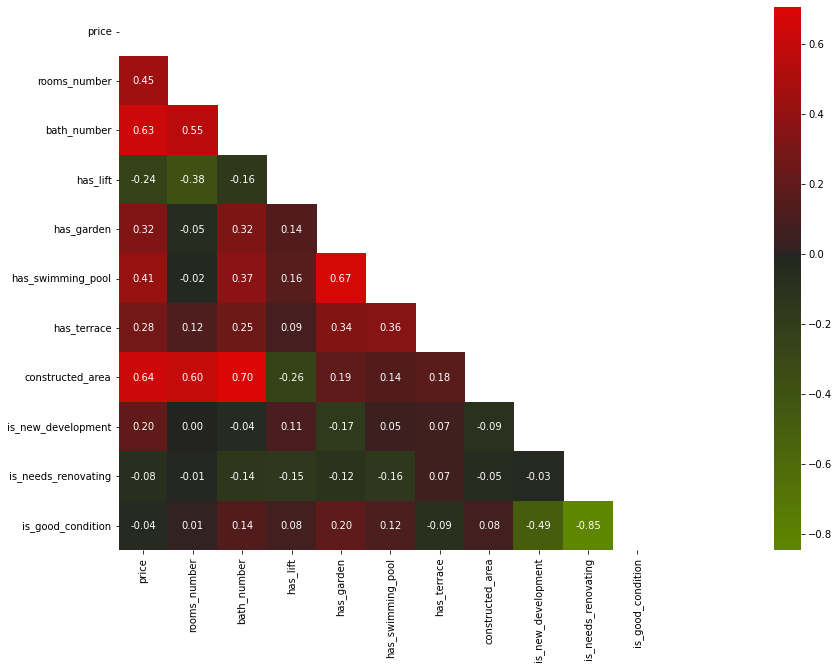

In [ ]:
#Create a mask for the heatmap

my_mask = np.triu(np.ones_like(data_correlation, dtype=bool))

#Heatmap color palette

my_cmap = sns.diverging_palette(100, 20, s = 200, l =50, n=5,
                                center = "dark",
                                as_cmap = True)

plt.figure(figsize=(40,10))

sns.heatmap(data_correlation, mask = my_mask,
            cmap = my_cmap, center = 0, fmt = ".2f",
            annot = True, square = True)

plt.show()

In [ ]:
# Matrix of scatterplots
from pandas.plotting import scatter_matrix

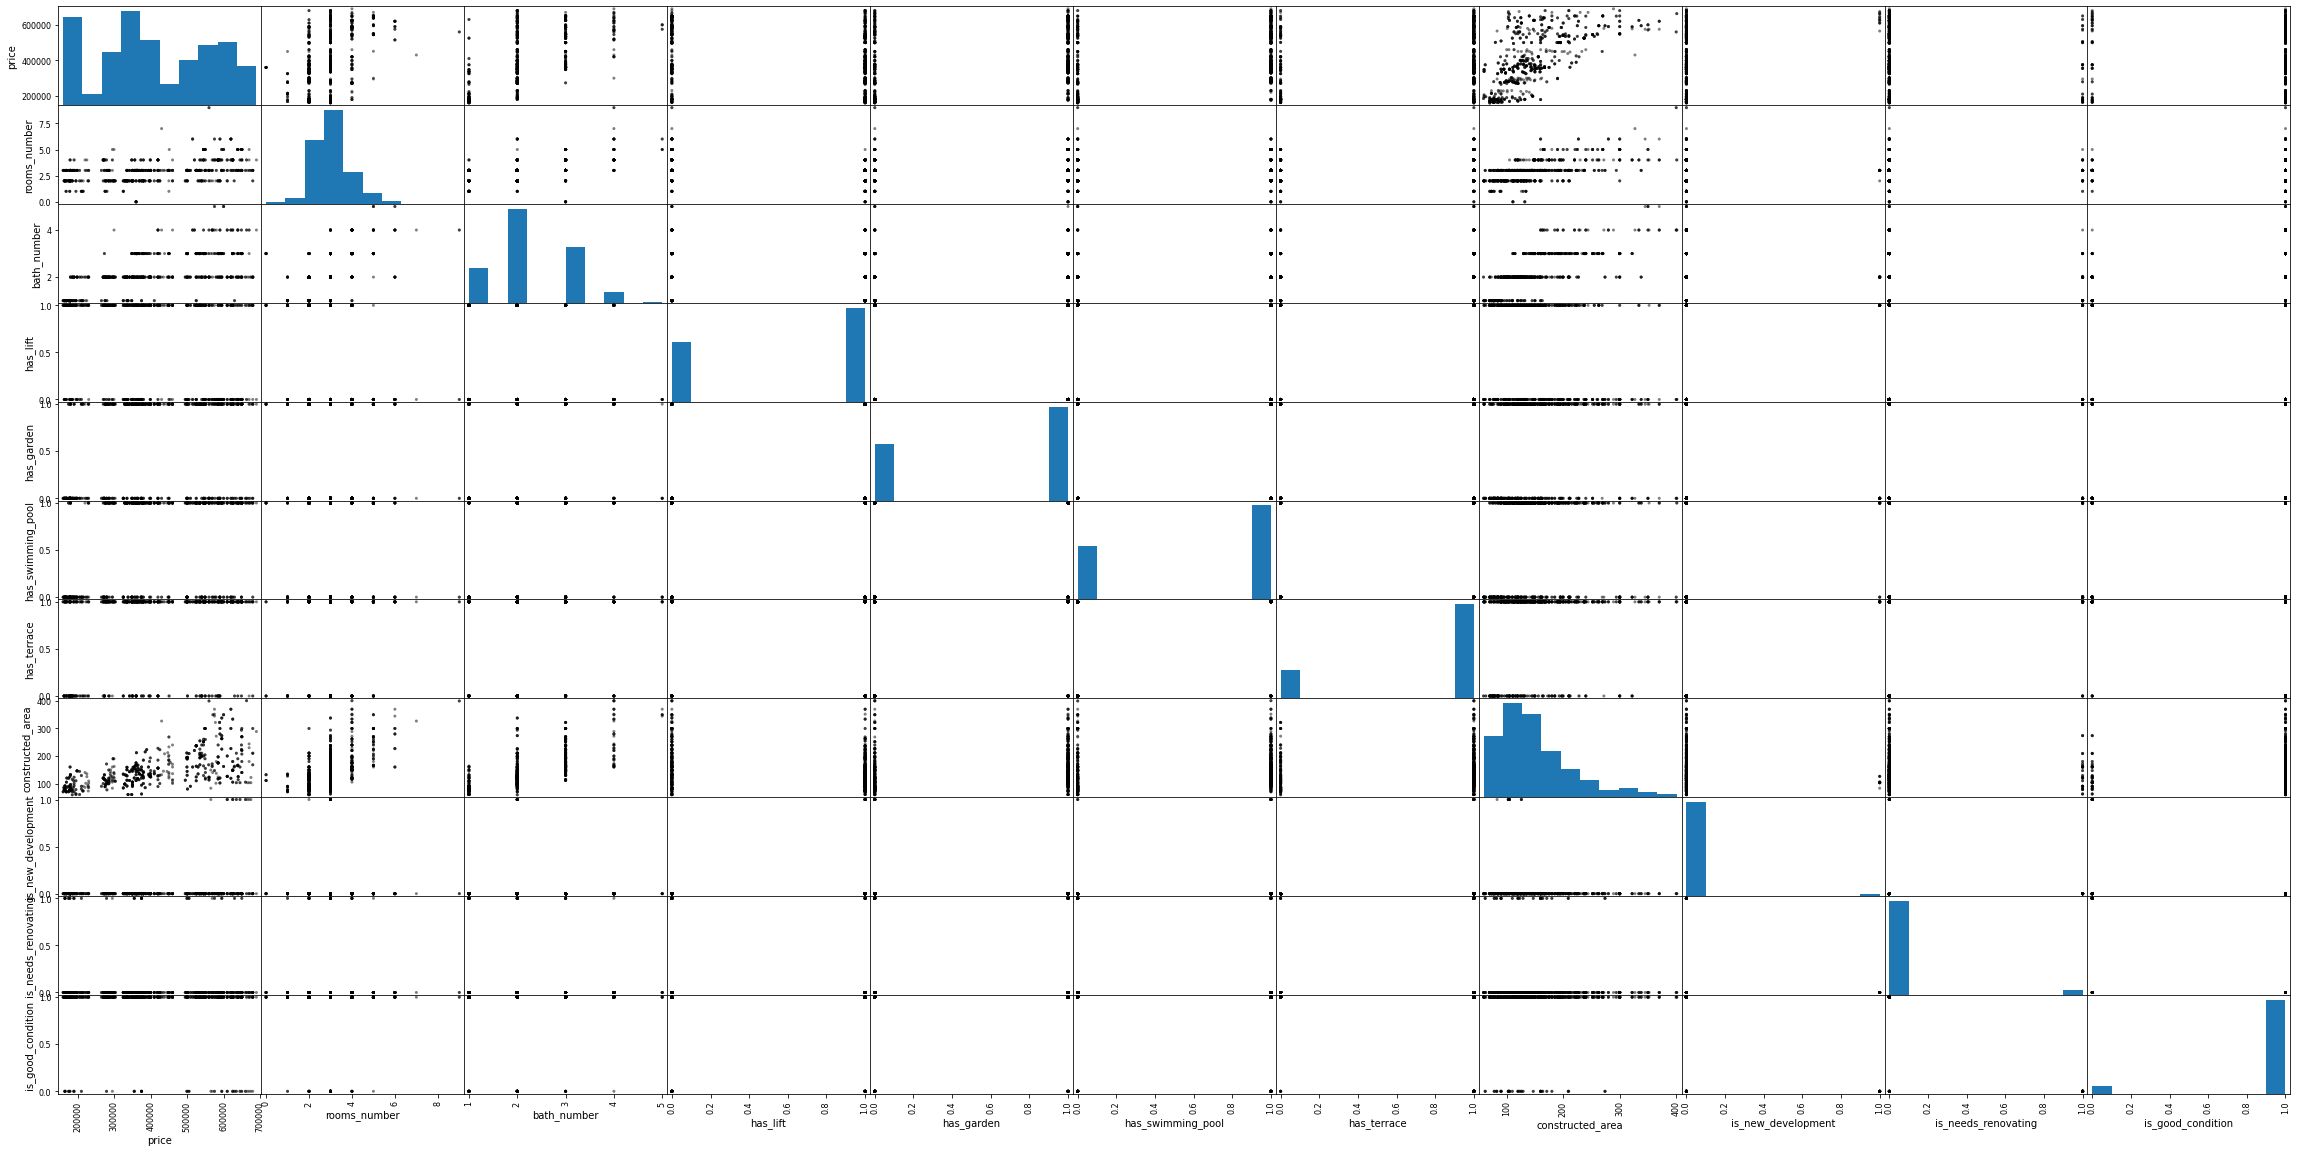

In [ ]:
attributes = ["price", "rooms_number", "bath_number", "has_lift", "has_garden",
              "has_swimming_pool", "has_terrace", "constructed_area",
              "is_new_development", "is_needs_renovating", "is_good_condition"]

scatter_matrix(data[attributes],
              figsize = (40,20),
              color = "black")

plt.show()

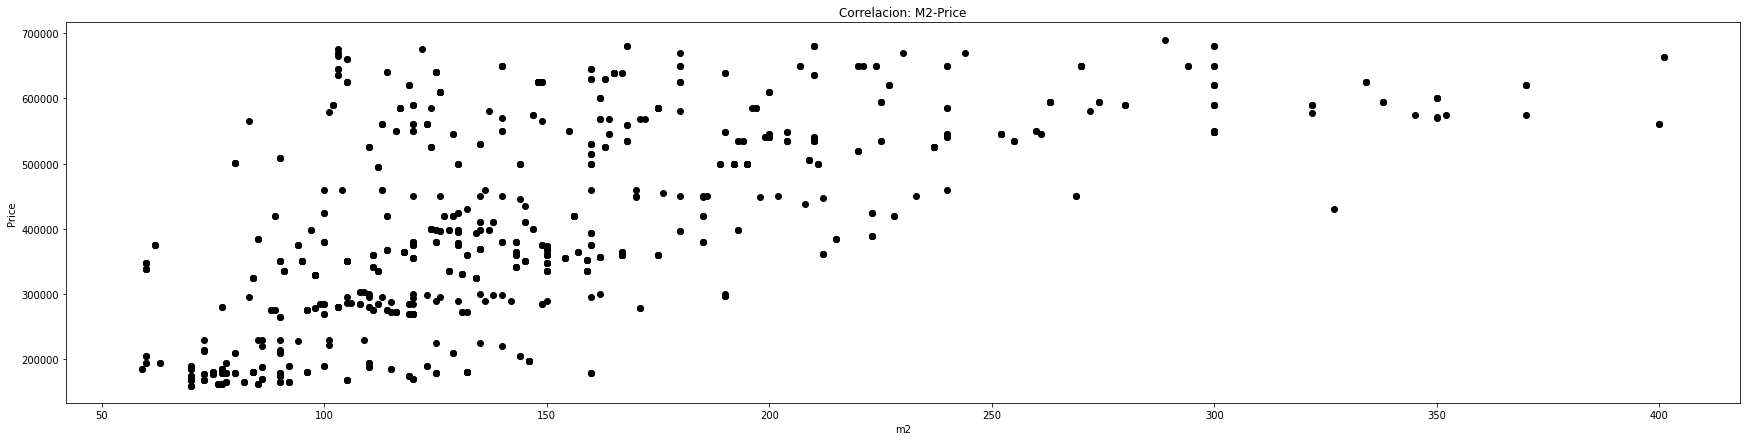

In [ ]:
#Correlation between price and m2

fig, ax = plt.subplots(figsize=(30,7))

ax.scatter(x = "constructed_area", y = "price", data = data, c = "black")

ax.set_xlabel("m2")
ax.set_ylabel("Price")
ax.set_title("Correlacion: M2-Price")
plt.show()

In [ ]:
# We add the values ​​of the dataset to X and Y to be able to test the different models

x = data.drop(["price"], axis=1)
x

,rooms_number,bath_number,has_lift,has_garden,has_swimming_pool,has_terrace,constructed_area,is_new_development,is_needs_renovating,is_good_condition
0,3,1,1,0,0,1,70,0,0,1
1,3,1,1,0,0,0,85,0,0,1
2,2,1,1,0,0,0,77,0,0,1
3,2,1,0,0,0,0,76,0,0,1
4,2,1,1,0,0,1,92,0,0,1
...,...,...,...,...,...,...,...,...,...,...
893,2,2,1,1,1,1,135,0,0,1
894,2,2,1,1,1,1,120,0,0,1
895,2,2,1,1,1,1,109,0,0,1
896,2,2,1,0,1,1,108,0,0,1


In [ ]:
y = data["price"]
y

0      160000
1      162000
2      163000
3      163000
4      165000
        ...  
893    300000
894    300000
895    303000
896    303000
897    303000
Name: price, Length: 898, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.20)

In [ ]:
x_train

,rooms_number,bath_number,has_lift,has_garden,has_swimming_pool,has_terrace,constructed_area,is_new_development,is_needs_renovating,is_good_condition
729,3,2,0,1,1,1,140,0,0,1
249,3,3,1,1,1,1,215,0,0,1
805,3,2,1,1,1,1,168,0,0,1
365,3,2,1,1,1,1,154,0,0,1
575,3,2,1,1,1,1,124,0,0,1
...,...,...,...,...,...,...,...,...,...,...
544,3,2,1,0,1,1,155,0,0,1
708,5,3,0,1,1,1,165,0,0,1
878,2,2,1,1,1,1,83,0,0,1
430,3,3,1,1,1,1,223,0,0,1


In [ ]:
x_test

,rooms_number,bath_number,has_lift,has_garden,has_swimming_pool,has_terrace,constructed_area,is_new_development,is_needs_renovating,is_good_condition
275,3,2,1,1,1,1,154,0,0,1
329,2,3,1,1,1,1,135,0,0,1
72,3,2,1,0,0,0,70,0,0,1
586,2,2,1,1,0,0,199,0,0,1
563,3,2,0,0,0,1,195,0,0,1
...,...,...,...,...,...,...,...,...,...,...
422,4,3,1,0,1,1,156,0,0,1
143,3,2,0,0,0,0,144,0,0,1
18,2,1,1,0,0,0,75,0,0,1
701,4,3,0,1,1,1,149,0,0,1


In [ ]:
y_train

729    650000
249    385000
805    680000
365    355000
575    525000
        ...  
544    550000
708    639000
878    295000
430    425000
129    185000
Name: price, Length: 718, dtype: int64

In [ ]:
y_test

275    355000
329    410000
72     190000
586    540000
563    500000
        ...  
422    420000
143    205000
18     178000
701    625000
31     162000
Name: price, Length: 180, dtype: int64

In [ ]:
#Linear Regression Model

#Required libraries and model

from sklearn.linear_model import LinearRegression

data_model_lr = LinearRegression()

# We must add .values ​​to the end of the variables, it will return a 2-dimensional array

data_model_lr.fit(x_train.values, y_train.values)

print("Proceso completado")

Proceso completado


In [ ]:
# To visualize the data we will use .predict on x_test and save it in a new variable

# We make a loop between y_pred and y_test outputting them with a print to check differences

# We will add a third ABS column to check the error between y_pred and y_test

# Prediction

y_pred_lr = data_model_lr.predict(x_test.values)

y_test_array_lr = y_test.values

print("Prec real Prec estim Error abs")
for price in range(10):
  real_price = y_test_array_lr[price]
  estim_price = y_pred_lr[price]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")

Prec real Prec estim Error abs
355000.00    421009.07         66009.07
410000.00    428245.61         18245.61
190000.00    224328.38         34328.38
540000.00    360765.91        179234.09
500000.00    409247.63         90752.37
365000.00    446051.64         81051.64
525000.00    528575.39          3575.39
575000.00    699329.25        124329.25
364000.00    389404.23         25404.23
348000.00    279216.73         68783.27


In [ ]:
# Libraries to import
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# We will calculate coefficients, mean square error and coefficient of determination

# Coefficients
print("Coeficienes: \n", data_model_lr.coef_)

# MSE
print("MSE: %.2f" % mean_squared_error(y_test_array_lr, y_pred_lr, squared=False))

# Coefficient of determination: 1 is a perfect prediction
print("Coeficiente de determinacion: %.2f" % r2_score(y_test_array_lr, y_pred_lr))

Coeficienes: 
 [  10782.72885509   34699.59850979  -54953.15349018   33969.58294689
   68739.41893826   20227.0684144      877.91221743  204248.06150338
 -102668.10926561 -101579.95223777]
MSE: 93019.40
Coeficiente de determinacion: 0.63


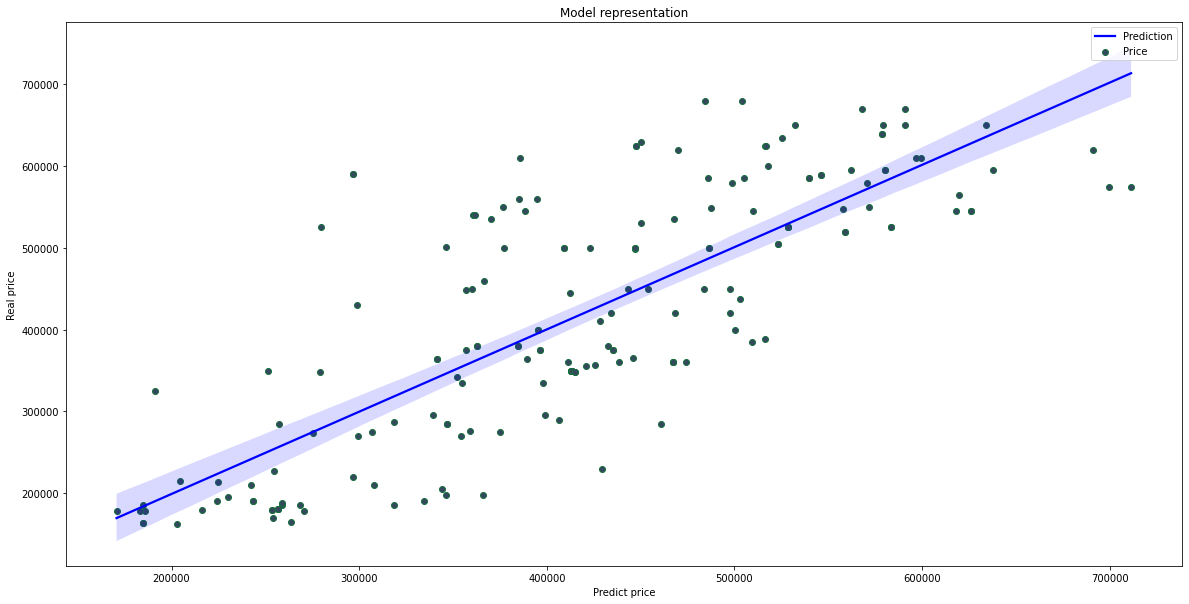

In [ ]:
# Model display

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_xlabel("Predict price")
ax.set_ylabel("Real price")
ax.set_title("Model representation")

sns.regplot(x = y_pred_lr,
            y = y_test_array_lr,
            color = "#34495E",
            scatter_kws = {"alpha":1, "edgecolor":"#196F3D"},
            line_kws = {"color":"blue"})

ax.legend(["Prediction", "Price"]);

In [ ]:
# Test prediction:

house_lr = np.array([[2, 1, 0, 0, 0, 0, 80, 0, 0, 1]])

print(f"El precio de la casa es {data_model_lr.predict(house_lr)[0].round()}€")

El precio de la casa es 242578.0€


In [ ]:
#Lasso regression model

#We import necessary libraries

from sklearn.linear_model import Lasso

data_model_ls = Lasso()

# We train the model
data_model_ls.fit(x_train.values, y_train.values)

print("Proceso completado")

Proceso completado


In [ ]:
# In all we will convert the variable x_test to y_pred and test the model

y_pred_ls = data_model_ls.predict(x_test.values)
y_test_array_ls = y_test.values

print("Real price Estim price Error abs")
for price in range(10):
  real_price = y_pred_ls[price]
  estim_price = y_test_array_ls[price]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")


Real price Estim price Error abs
421009.80    355000.00         66009.80
428245.55    410000.00         18245.55
224336.22    190000.00         34336.22
360768.84    540000.00        179231.16
409245.19    500000.00         90754.81
446051.70    365000.00         81051.70
528578.42    525000.00          3578.42
699331.02    575000.00        124331.02
389403.82    364000.00         25403.82
279201.37    348000.00         68798.63


In [ ]:
# Coefficients, MSE and Coefficient of determination

# Coefficients
print("Coeficientes: \n", data_model_ls)

# MSE
print("MSE: %.2f" % mean_squared_error(y_test_array_ls, y_pred_ls, squared=False))

# Determination coefficient
print("Coeficiente de determinacion: %.2f" % r2_score(y_test_array_ls, y_pred_ls))

Coeficientes: 
 Lasso()
MSE: 94386.43
Coeficiente de determinacion: 0.62


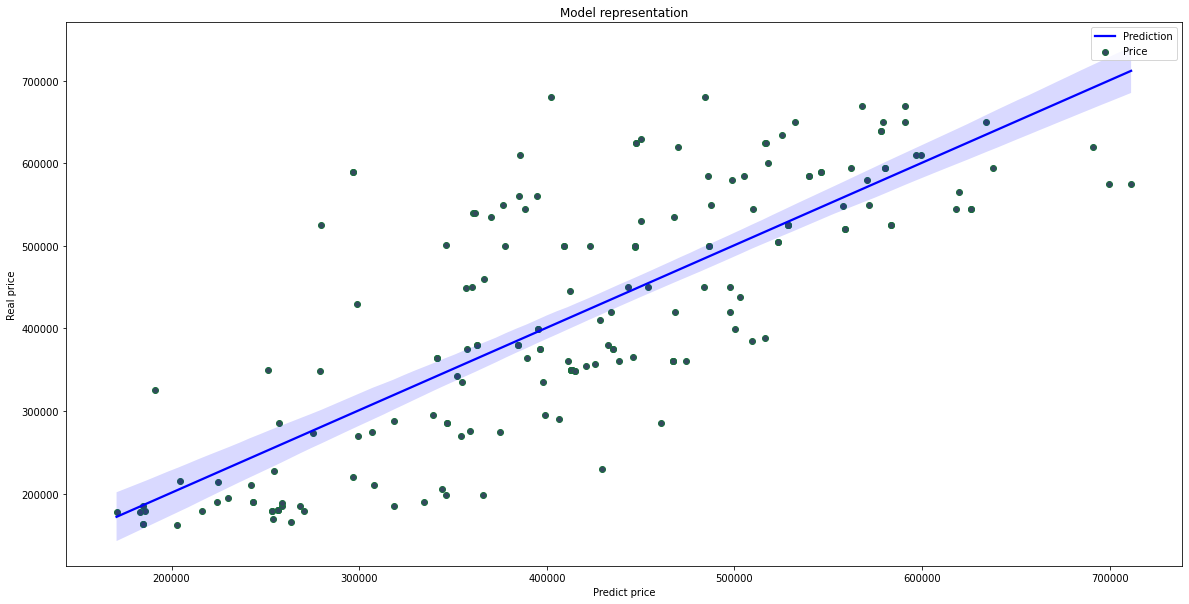

In [ ]:
# Display the result


fig, ax = plt.subplots(figsize=(20, 10))

ax.set_xlabel("Predict price")
ax.set_ylabel("Real price")
ax.set_title("Model representation")

sns.regplot(x = y_pred_ls,
            y = y_test_array_ls,
            color = "#34495E",
            scatter_kws = {"alpha":1, "edgecolor":"#196F3D"},
            line_kws = {"color":"blue"})

ax.legend(["Prediction", "Price"]);

In [ ]:
# prediction test

house_ls = np.array([[2, 1, 0, 0, 0, 0, 80, 0, 0, 1]])

print(f"El precio de la casa es {data_model_ls.predict(house_ls)[0].round()}€")

El precio de la casa es 242577.0€


In [ ]:
# Ridge regression model

# Import libraries and model

from sklearn.linear_model import Ridge

data_model_rg = Ridge()

data_model_rg.fit(x_train.values, y_train.values)

print("Proceso completado")

Proceso completado


In [ ]:
# In all we will convert the variable x_test to y_pred and test the model

y_pred_rg = data_model_rg.predict(x_test.values)
y_test_array_rg = y_test.values

print("Real price Estim price Error abs")
for price in range(10):
  real_price = y_pred_rg[price]
  estim_price = y_test_array_rg[price]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")

Real price Estim price Error abs
421365.57    355000.00         66365.57
428522.07    410000.00         18522.07
225309.69    190000.00         35309.69
359711.74    540000.00        180288.26
409072.24    500000.00         90927.76
446521.29    365000.00         81521.29
528879.32    525000.00          3879.32
699748.54    575000.00        124748.54
389824.19    364000.00         25824.19
277377.52    348000.00         70622.48


In [ ]:
# Coefficients, MSE and Coefficient of determination

# Coefficients
print("Coeficientes: \n", data_model_rg)

# MSE
print("MSE: %.2f" % mean_squared_error(y_test_array_rg, y_pred_rg, squared=False))

#Determination coefficient
print("Coeficiente de determinacion: %.2f" % r2_score(y_test_array_rg, y_pred_rg))

Coeficientes: 
 Ridge()
MSE: 93104.43
Coeficiente de determinacion: 0.63


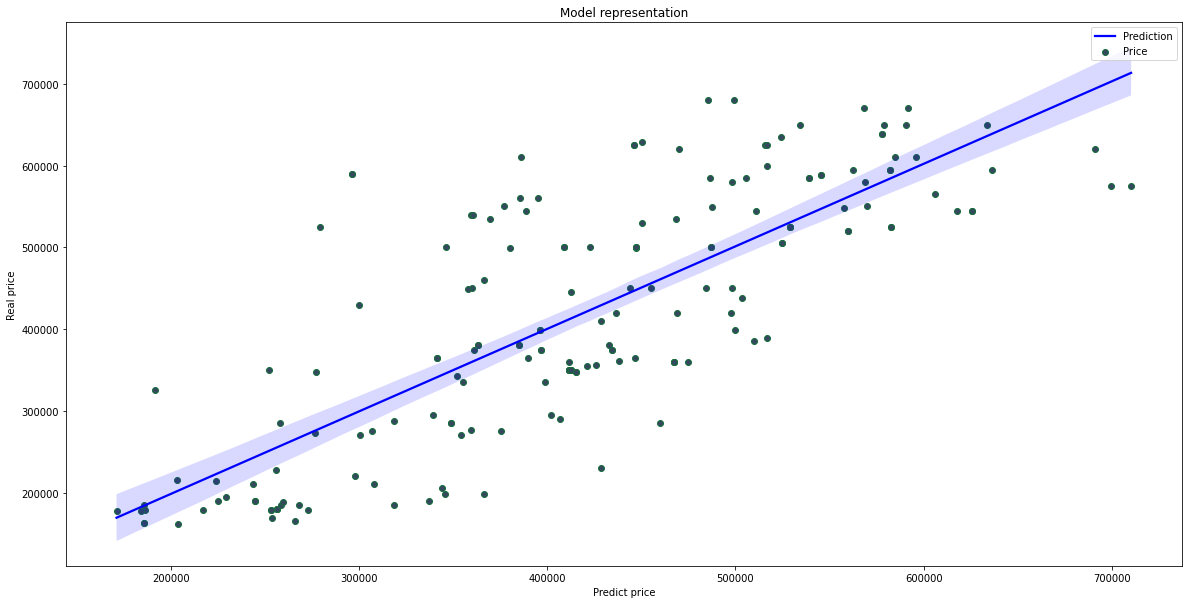

In [ ]:
# Display the result


fig, ax = plt.subplots(figsize=(20, 10))

ax.set_xlabel("Predict price")
ax.set_ylabel("Real price")
ax.set_title("Model representation")

sns.regplot(x = y_pred_rg,
            y = y_test_array_rg,
            color = "#34495E",
            scatter_kws = {"alpha":1, "edgecolor":"#196F3D"},
            line_kws = {"color":"blue"})

ax.legend(["Prediction", "Price"]);

In [ ]:
# Prediction test

house_rg = np.array([[2, 1, 0, 0, 0, 0, 80, 0, 0, 1]])

print(f"El precio de la casa es {data_model_ls.predict(house_rg)[0].round()}€")

El precio de la casa es 242577.0€


In [ ]:
# Decision Tree Model

# We import libraries and models

from sklearn.tree import DecisionTreeRegressor

data_model_tree = DecisionTreeRegressor()

data_model_tree.fit(x_train.values, y_train.values)

print("Proceso completado")

Proceso completado


In [ ]:
y_pred_tree = data_model_tree.predict(x_test.values)
y_test_array_tree = y_test.values

print("Real price Estim price Error abs")
for price in range(100):
  real_price = y_pred_tree[price]
  estim_price = y_test_array_tree[price]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")

Real price Estim price Error abs
355000.00    355000.00             0.00
410000.00    410000.00             0.00
190000.00    190000.00             0.00
540000.00    540000.00             0.00
500000.00    500000.00             0.00
365000.00    365000.00             0.00
525000.00    525000.00             0.00
600000.00    575000.00         25000.00
364000.00    364000.00             0.00
342285.71    348000.00          5714.29
583250.00    589000.00          5750.00
174000.00    185000.00         11000.00
329000.00    230000.00         99000.00
180000.00    227500.00         47500.00
590000.00    590000.00             0.00
178500.00    178500.00             0.00
325000.00    325000.00             0.00
360000.00    290000.00         70000.00
549000.00    549000.00             0.00
453571.43    399000.00         54571.43
572000.00    580000.00          8000.00
620000.00    620000.00             0.00
275000.00    275000.00             0.00
652857.14    565000.00         87857.14
215000.

In [ ]:
# End of training

y_pred_tree_re = y_pred_tree[::-1]
y_test_array_tree_re = y_test_array_tree[::-1]

print("Real price Estim price Error abs")
for i in range(10):
  real_price = y_pred_tree_re[i]
  estim_price = y_test_array_tree_re[i]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")

Real price Estim price Error abs
162000.00    162000.00             0.00
625000.00    625000.00             0.00
178000.00    178000.00             0.00
205000.00    205000.00             0.00
420000.00    420000.00             0.00
303000.00    285000.00         18000.00
590000.00    590000.00             0.00
361875.00    360000.00          1875.00
348000.00    445000.00         97000.00
195000.00    195000.00             0.00


In [ ]:
# Coefficients, MSE and Coefficient of determination

# Coefficients
print("Coeficientes: \n", data_model_tree)

# MSE
print("MSE: %.2f" % mean_squared_error(y_test_array_tree, y_pred_tree, squared=False))

# Determination coefficient
print("Coeficiente de determinacion: %.2f" % r2_score(y_test_array_tree, y_pred_tree))

Coeficientes: 
 DecisionTreeRegressor()
MSE: 52316.73
Coeficiente de determinacion: 0.88


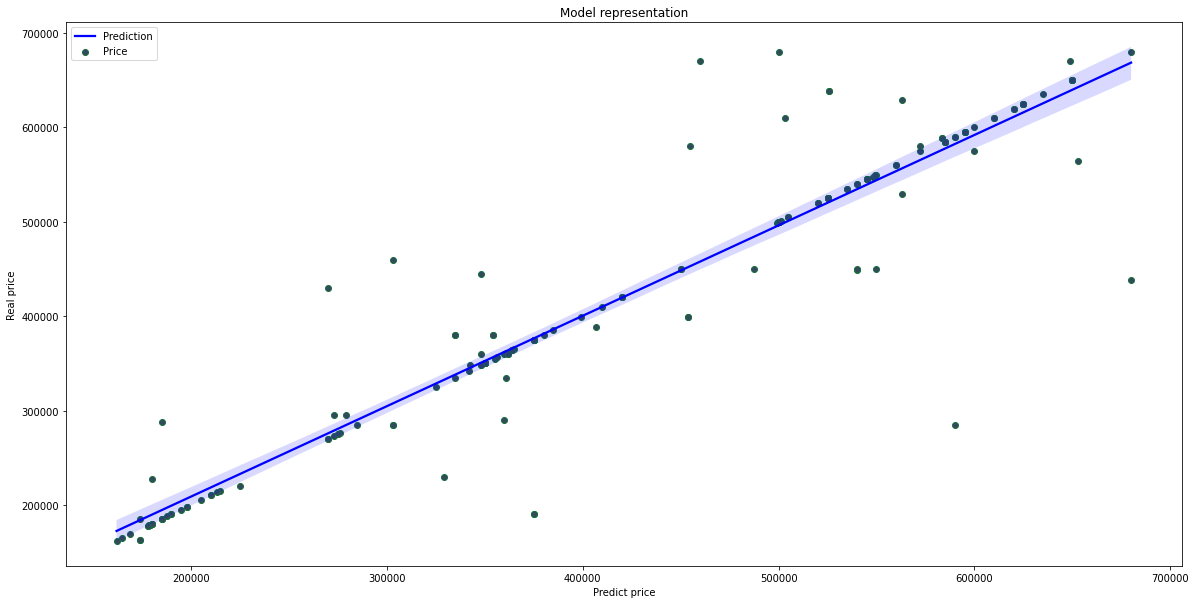

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_xlabel("Predict price")
ax.set_ylabel("Real price")
ax.set_title("Model representation")

sns.regplot(x = y_pred_tree,
            y = y_test_array_tree,
            color = "#34495E",
            scatter_kws = {"alpha":1, "edgecolor":"#196F3D"},
            line_kws = {"color":"blue"})

ax.legend(["Prediction", "Price"]);

In [ ]:
# Prediction test

house_tree = np.array([[2, 1, 0, 0, 0, 0, 80, 0, 0, 1]])

print(f"El precio de la casa es {data_model_tree.predict(house_tree)[0].round()}€")

El precio de la casa es 178500.0€


In [ ]:
# We import model and necessary libraries

from sklearn.ensemble import RandomForestRegressor

data_model_rf = RandomForestRegressor()

data_model_rf.fit(x_train.values, y_train.values)

print("Proceso terminado")

Proceso terminado


In [ ]:
# We check differences and absolute error

y_pred_rf = data_model_rf.predict(x_test.values)
y_test_array_rf = y_test.values

print("Real price Estim price Error abs")
for price in range(10):
  real_price = y_pred_rf[price]
  estim_price = y_test_array_rf[price]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")

Real price Estim price Error abs
356570.00    355000.00          1570.00
395766.14    410000.00         14233.86
202800.00    190000.00         12800.00
538319.95    540000.00          1680.05
490789.00    500000.00          9211.00
374912.14    365000.00          9912.14
525000.00    525000.00             0.00
602010.00    575000.00         27010.00
388010.00    364000.00         24010.00
342304.83    348000.00          5695.17


In [ ]:
# We check the same values ​​but in reverse

y_pred_rf_rf = y_pred_rf[::-1]
y_test_array_rf_rf = y_test_array_rf[::-1]

print("Real price Estim price Error abs")
for i in range(100):
  real_price = y_pred_rf_rf[i]
  estim_price = y_test_array_rf_rf[i]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")

Real price Estim price Error abs
171989.99    162000.00          9989.99
621150.00    625000.00          3850.00
177563.32    178000.00           436.68
210064.35    205000.00          5064.35
438480.00    420000.00         18480.00
287354.96    285000.00          2354.96
429741.30    590000.00        160258.70
361880.06    360000.00          1880.06
402804.96    445000.00         42195.04
188985.00    195000.00          6015.00
521843.57    450000.00         71843.57
453185.00    420000.00         33185.00
585400.00    585000.00           400.00
179999.90    179999.00             0.90
560611.57    530000.00         30611.57
353354.00    348000.00          5354.00
495424.50    625000.00        129575.50
226800.00    210000.00         16800.00
349790.00    350000.00           210.00
319469.10    364000.00         44530.90
351655.00    350000.00          1655.00
496596.07    545000.00         48403.93
501838.00    520000.00         18162.00
351655.00    350000.00          1655.00
540216.

In [ ]:
# Coefficients, MSE and Coefficient of determination

# Coefficients
print("Coeficientes: \n", data_model_rf)

# MSE
print("MSE: %.2f" % mean_squared_error(y_test_array_rf, y_pred_rf, squared=False))

# Determination coefficient
print("Coeficiente de determinacion: %.2f" % r2_score(y_test_array_rf, y_pred_rf))

Coeficientes: 
 RandomForestRegressor()
MSE: 48840.17
Coeficiente de determinacion: 0.90


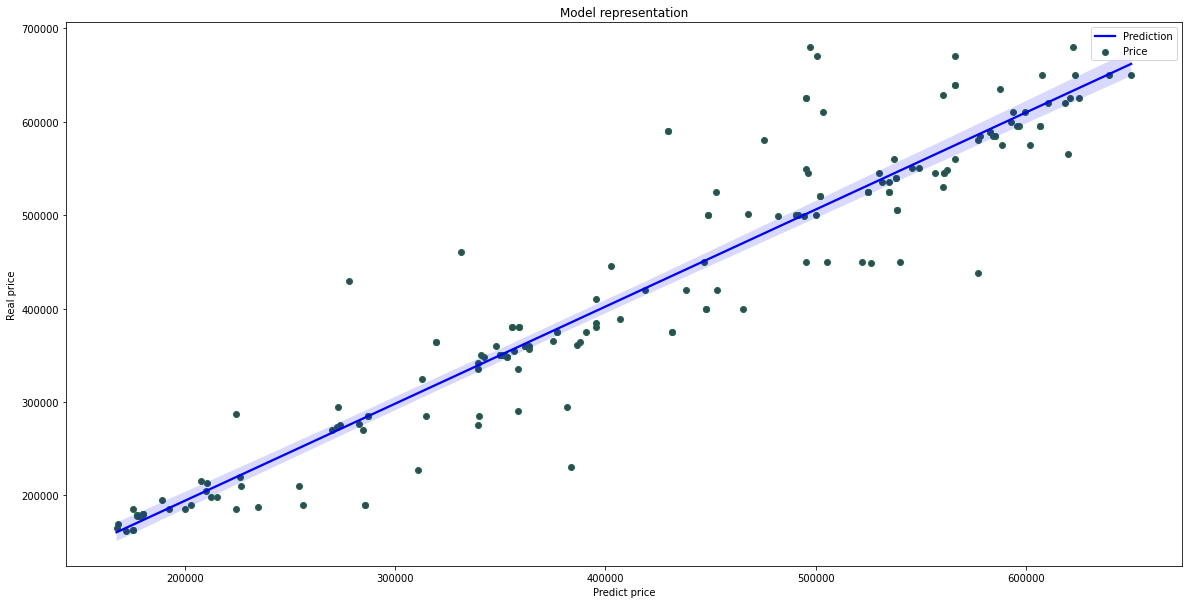

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_xlabel("Predict price")
ax.set_ylabel("Real price")
ax.set_title("Model representation")

sns.regplot(x = y_pred_rf,
            y = y_test_array_rf,
            color = "#34495E",
            scatter_kws = {"alpha":1, "edgecolor":"#196F3D"},
            line_kws = {"color":"blue"})

ax.legend(["Prediction", "Price"]);

In [ ]:
# We import the libraries and model
from sklearn.ensemble import GradientBoostingRegressor

data_model_gr = GradientBoostingRegressor()

data_model_gr.fit(x_train.values, y_train.values)

print("Proceso completado")

Proceso completado


In [ ]:
# We check differences and absolute error

y_pred_gr = data_model_gr.predict(x_test.values)
y_test_array_gr = y_test.values

print("Real price Estim price Error abs")
for price in range(10):
  real_price = y_pred_gr[price]
  estim_price = y_test_array_gr[price]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")

Real price Estim price Error abs
412973.69    355000.00         57973.69
394687.64    410000.00         15312.36
212387.52    190000.00         22387.52
511272.41    540000.00         28727.59
529328.71    500000.00         29328.71
412208.79    365000.00         47208.79
506436.33    525000.00         18563.67
575745.29    575000.00           745.29
459336.52    364000.00         95336.52
325027.05    348000.00         22972.95


In [ ]:
# Coefficients, MSE and Coefficient of determination

# Coefficients
print("Coeficientes: \n", data_model_gr)

# MSE
print("MSE: %.2f" % mean_squared_error(y_test_array_rf, y_pred_rf, squared=False))

# Determination coefficient
print("Coeficiente de determinacion: %.2f" % r2_score(y_test_array_gr, y_pred_gr))

Coeficientes: 
 GradientBoostingRegressor()
MSE: 48840.17
Coeficiente de determinacion: 0.76


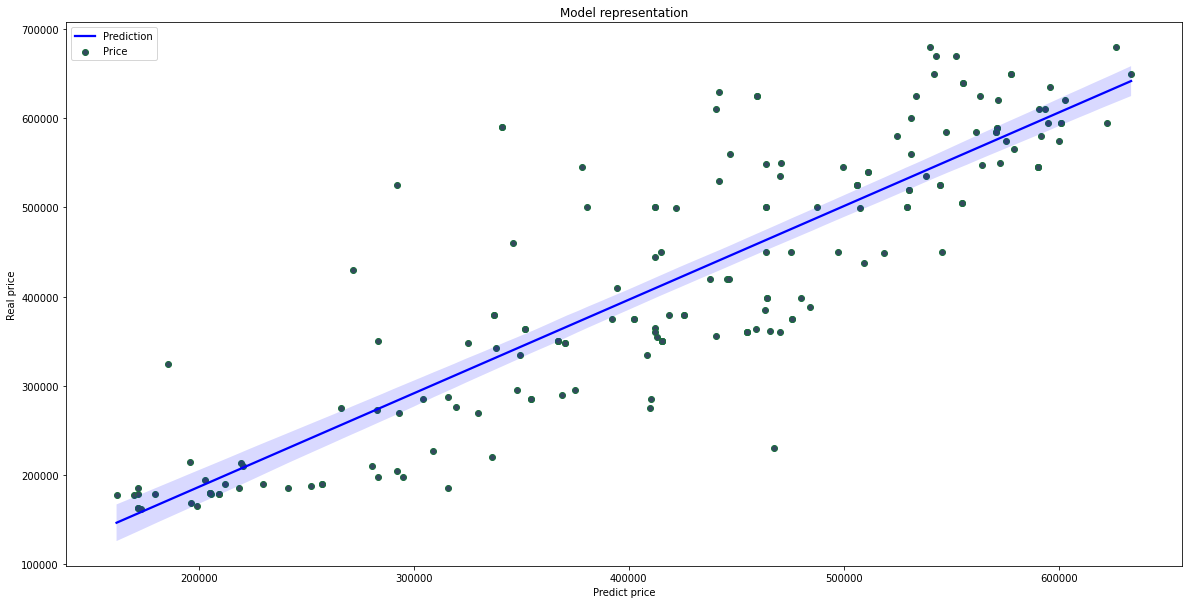

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_xlabel("Predict price")
ax.set_ylabel("Real price")
ax.set_title("Model representation")

sns.regplot(x = y_pred_gr,
            y = y_test_array_gr,
            color = "#34495E",
            scatter_kws = {"alpha":1, "edgecolor":"#196F3D"},
            line_kws = {"color":"blue"})

ax.legend(["Prediction", "Price"]);

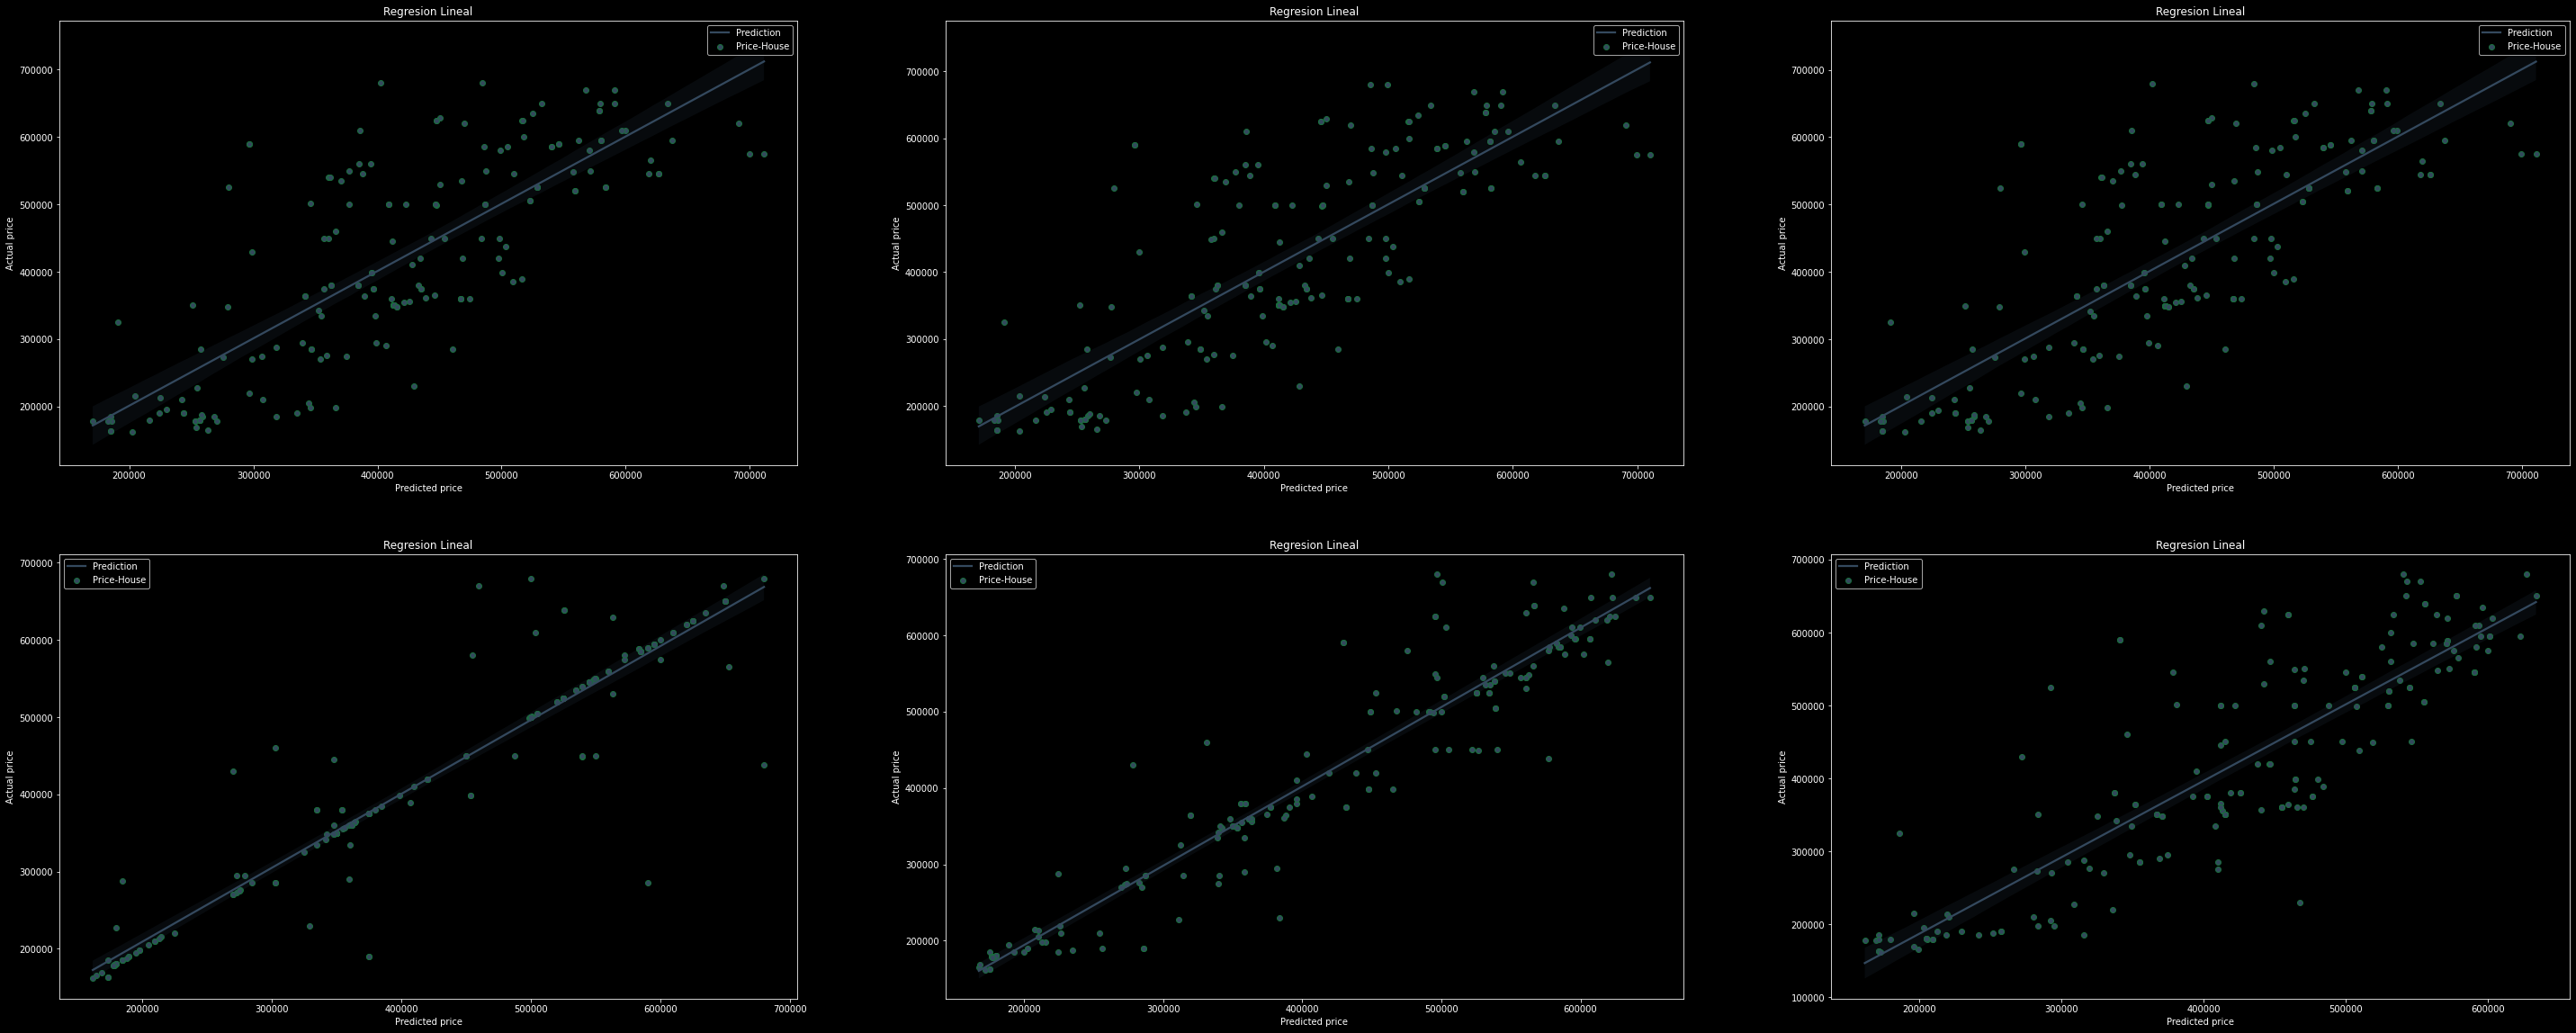

In [ ]:
# We will represent the 6 models graphically to check which of them is the most suitable for us

# Preparation of the graphics
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize = (50, 20), nrows = 2, ncols = 3)

# If we want to pass additional parameters I have to use:

# scatter_kws -> To add parameters to plt.scatter and plt.plot
# line_kws -> The same but for the line
# fit_reg -> Activate the display of the line


# Linear regression

ax[0, 0].set_xlabel("Predicted price")
ax[0, 0].set_ylabel("Actual price")
ax[0, 0].set_title("Regresion Lineal")

sns.regplot(x = y_pred_ls, y = y_test_array_ls,
            color = "#34495E",
            scatter_kws={"alpha":1, "edgecolor":"#196F3D"},
            fit_reg=True,
            ax = ax[0, 0])

ax[0, 0].legend(["Prediction", "Price-House"])


# Ridge

ax[0, 1].set_xlabel("Predicted price")
ax[0, 1].set_ylabel("Actual price")
ax[0, 1].set_title("Regresion Lineal")

sns.regplot(x = y_pred_rg, y = y_test_array_rg,
            color = "#34495E",
            scatter_kws={"alpha":1, "edgecolor":"#196F3D"},
            fit_reg=True,
            ax = ax[0, 1])

ax[0, 1].legend(["Prediction", "Price-House"])


# Lasso

ax[0, 2].set_xlabel("Predicted price")
ax[0, 2].set_ylabel("Actual price")
ax[0, 2].set_title("Regresion Lineal")

sns.regplot(x = y_pred_ls, y = y_test_array_ls,
            color = "#34495E",
            scatter_kws={"alpha":1, "edgecolor":"#196F3D"},
            fit_reg=True,
            ax = ax[0, 2])

ax[0, 2].legend(["Prediction", "Price-House"])


# Decision Tree

ax[1, 0].set_xlabel("Predicted price")
ax[1, 0].set_ylabel("Actual price")
ax[1, 0].set_title("Regresion Lineal")

sns.regplot(x = y_pred_tree, y = y_test_array_tree,
            color = "#34495E",
            scatter_kws={"alpha":1, "edgecolor":"#196F3D"},
            fit_reg=True,
            ax = ax[1, 0])

ax[1, 0].legend(["Prediction", "Price-House"])


# Random Forest

ax[1, 1].set_xlabel("Predicted price")
ax[1, 1].set_ylabel("Actual price")
ax[1, 1].set_title("Regresion Lineal")

sns.regplot(x = y_pred_rf, y = y_test_array_rf,
            color = "#34495E",
            scatter_kws={"alpha":1, "edgecolor":"#196F3D"},
            fit_reg=True,
            ax = ax[1, 1])

ax[1, 1].legend(["Prediction", "Price-House"])


# Gradient Boosting

ax[1, 2].set_xlabel("Predicted price")
ax[1, 2].set_ylabel("Actual price")
ax[1, 2].set_title("Regresion Lineal")

sns.regplot(x = y_pred_gr, y = y_test_array_gr,
            color = "#34495E",
            scatter_kws={"alpha":1, "edgecolor":"#196F3D"},
            fit_reg=True,
            ax = ax[1, 2])

ax[1, 2].legend(["Prediction", "Price-House"])

Although we expose the 6 models, we already know that the one with the highest success rate would be, in this case, the Decision Tree model

It is a very small dataset (about 1000 homes), so it is a very low range of values ​​to predict

This has been the first model created and tested with its own Dataset